In [67]:
import pandas as pd
import sqlalchemy
import pprint
import psycopg2
import matplotlib.pyplot as plt
from config import pg_key
import numpy as np
import scipy.stats as stats

/opt/anaconda3/envs/Class/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/envs/Class/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/envs/Class/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [68]:
# SQLAlchemy
from sqlalchemy import create_engine

In [69]:
conn = psycopg2.connect(host="localhost", port = 5432, database="SQL-Challenge", user="postgres", password=pg_key)


In [70]:
# Salary info
sql = "Select * From Salaries Order By salary ASC;"
salary_df = pd.read_sql(sql, conn)
salary_df

,emp_no,salary
0,42589,40000
1,68253,40000
2,44127,40000
3,26876,40000
4,44124,40000
...,...,...
300019,37558,125469
300020,458302,126703
300021,444756,127041
300022,44188,127238


In [71]:
sql2 = "Select * From Employees Order By emp_no ASC;"
employ_df = pd.read_sql(sql2, conn)
employ_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,e0003,2053-09-02,Georgi,Facello,M,1986-06-26
1,10002,s0001,2064-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,e0003,2059-12-03,Parto,Bamford,M,1986-08-28
3,10004,e0003,2054-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...,...
300019,499995,e0002,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,e0003,2053-03-07,Zito,Baaz,M,1990-09-27
300021,499997,e0003,2061-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,s0001,2056-09-05,Patricia,Breugel,M,1993-10-13


In [72]:
sql3 = "Select * From Titles Order By title ASC;"
title_df = pd.read_sql(sql3, conn)
title_df

,title_id,title
0,e0001,Assistant Engineer
1,e0002,Engineer
2,m0001,Manager
3,e0003,Senior Engineer
4,s0002,Senior Staff
5,s0001,Staff
6,e0004,Technique Leader


In [73]:
# Salary range
min_sal = '${:0,.0f}'.format(salary_df["salary"].min())
max_sal = '${:0,.0f}'.format(salary_df["salary"].max())

min_sal, max_sal

('$40,000', '$129,492')

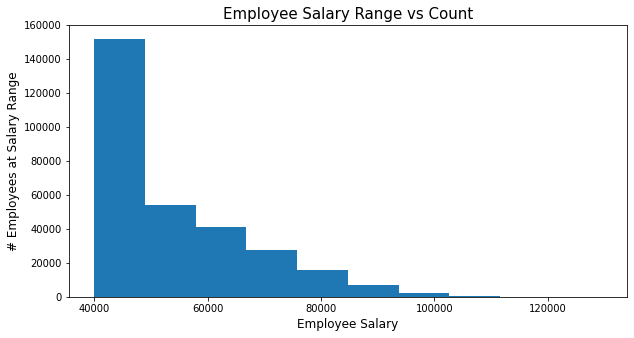

In [81]:
# Create a histogram to visualise the most common salary ranges for employees.
fig = plt.figure(figsize=(10,5))
plt.hist(salary_df["salary"])
plt.xlabel("Employee Salary", fontsize=12)
plt.ylabel("# Employees at Salary Range", fontsize=12)
plt.ylim(0, 160000)
plt.title("Employee Salary Range vs Count", fontsize=15)
plt.savefig("../sql-challenge/SalaryVsCount.png", bbox_inches = "tight")
plt.show()

In [75]:
sal_emp = pd.read_sql("Select * From Salaries Inner Join Employees On Salaries.emp_no = Employees.emp_no Inner Join Titles On Titles.title_id = Employees.emp_title_id", conn)
sal_emp.head()

,emp_no,salary,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,10005,78228,10005,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,s0001,Staff
1,10010,72488,10010,e0002,2063-06-01,Duangkaew,Piveteau,F,1989-08-24,e0002,Engineer
2,10011,42365,10011,s0001,2053-11-07,Mary,Sluis,F,1990-01-22,s0001,Staff
3,10013,40000,10013,s0002,2063-06-07,Eberhardt,Terkki,M,1985-10-20,s0002,Senior Staff
4,10017,71380,10017,s0001,2058-07-06,Cristinel,Bouloucos,F,1993-08-03,s0001,Staff


In [76]:
avg_sal = sal_emp.groupby(["title"]).mean()["salary"]
avg_sal

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

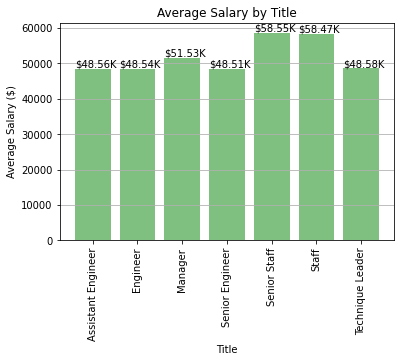

In [82]:
# Create a bar chart of average salary by title
titles = avg_sal.index
values = avg_sal.values
x_axis = np.arange(len(titles))
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, titles, rotation=90)
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Average Salary ($)")
plt.grid(axis = "y")
bar_plt = plt.bar(x_axis, values, color="g", alpha=0.5, align="center")
for i in bar_plt:
    yvalue = i.get_height()
    plt.text(i.get_x(), yvalue + 500, "${:,.2f}K".format(yvalue/1000))

plt.savefig("../sql-challenge/SalaryByTitle.png", bbox_inches = "tight")
plt.show()


In [37]:
# Search employee number 499942

sql3 = "Select emp_no, first_name, last_name From Employees where emp_no = 499942"
employee_df = pd.read_sql(sql3, conn)
employee_df

,emp_no,first_name,last_name
0,499942,April,Foolsday
